# Cracking the Code of Employee Attrition: Unraveling Insights and Strategies for Retention and Success in the Workplace 
![image](image.png)

_Photo Credit:_ [wallpaperflare](https://www.wallpaperflare.com/network-cloud-computing-with-nodes-technology-business-communication-wallpaper-aecql)

# 📷 HR Metrics: A Data-driven Journey
![image-4](image-4.png)


## 🌐 Link to Tableau Public dashboard
[HR Metrics: A Data Driven Journey](https://public.tableau.com/views/HRMetricsAData-drivenJourney/Salary_Dash?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

# 🧾 Executive summary

Below is a summary and break-down based on my analysis of employee, performance rating and education level data. 

### Employee Data:

- The employee data consists of 1,470 rows and 23 columns, including employee information such as demographics, employment details, and performance metrics.
- There are no missing values in the employee data, indicating a complete dataset.
### Performance Rating Data:

- The performance rating data consists of 6,709 rows and 1 column.
- However, the data seems to have not been properly parsed into individual columns, requiring further processing to enable analysis.
### Education Level Data:

- The education level data consists of 5 rows and 2 columns.
- No missing values are present in the education level data.
### Salary Analysis:

- The average salary is 85,029.39, with a minimum of 20,387 and a maximum of 150,000.
- There is a significant difference in salaries between different departments, as indicated by the T-tests and P-values.
### Attrition Analysis:

- The attrition rate is approximately 37%.
- There is a significant association between attrition and various factors such as gender, education, and ethnicity, as indicated by the Chi-square tests.
### Age and Years at Company Analysis:

- Age and years at the company significantly impact attrition, as shown by the T-tests and ANOVA tests.
- Employees in the age range of 30-39 have the highest attrition rate.
### Department-wise Attrition:

- The human resources department has the highest attrition rate, followed by sales and technology.
- The attrition rates differ significantly across departments.
### Job Satisfaction Analysis:

- Job satisfaction varies across departments, with different distributions of ratings.
- Employees working overtime tend to have higher job satisfaction levels.
### Retention Rate:

- The retention rate for employees working overtime is 52.26%, while for non-overtime employees, it is 21.96%. 
- This indicates that overtime employees are more likely to stay with the company.

Based on these findings, it is recommended to focus on strategies to improve employee retention, especially in the human resources department. Addressing factors such as job satisfaction, work-life balance, and career development opportunities can contribute to reducing attrition rates and improving overall employee engagement.

### Below is my Python code and analysis that I used to create my executive summary and Tableau Public dashboard: 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the employee data from the CSV file
employee_data = pd.read_csv('data/employee.csv')

# Load the performance rating data
performance_data = pd.read_csv('data/performance_rating.csv')

# Load the education level data
education_data = pd.read_csv('data/education_level.csv')

# Display the first few rows of the employee data
print("First few rows of employee data:")
print(employee_data.head())

# Check the structure of the employee data (number of rows, columns, data types)
print("\nData structure of employee data:")
print(employee_data.info())

# Check for missing values in the employee data
print("\nMissing values in employee data:")
print(employee_data.isnull().sum())

# Get summary statistics for numerical columns in the employee data
print("\nSummary statistics of employee data:")
print(employee_data.describe())

# Explore unique values in categorical columns in the employee data
print("\nUnique values in categorical columns of employee data:")
categorical_columns = ['Gender', 'BusinessTravel', 'Department', 'State', 'Ethnicity', 'EducationField',
                       'JobRole', 'MaritalStatus', 'OverTime', 'Attrition']
for column in categorical_columns:
    unique_values = employee_data[column].unique()
    print(f"{column}: {unique_values}")

# Explore unique values and frequency counts for Education Level in the employee data
print("\nEducation Level in employee data:")
education_level_counts = employee_data['Education'].value_counts()
print(education_level_counts)

# Display the first few rows of the performance rating data
print("\nFirst few rows of performance rating data:")
print(performance_data.head())

# Check the structure of the performance rating data (number of rows, columns, data types)
print("\nData structure of performance rating data:")
print(performance_data.info())

# Check for missing values in the performance rating data
print("\nMissing values in performance rating data:")
print(performance_data.isnull().sum())

# Display the first few rows of the education level data
print("\nFirst few rows of education level data:")
print(education_data.head())

# Check the structure of the education level data (number of rows, columns, data types)
print("\nData structure of education level data:")
print(education_data.info())

# Check for missing values in the education level data
print("\nMissing values in education level data:")
print(education_data.isnull().sum())

First few rows of employee data:
  EmployeeID   FirstName  ... YearsSinceLastPromotion YearsWithCurrManager
0  3012-1A41    Leonelle  ...                       9                    7
1  CBCB-9C9D     Leonerd  ...                      10                    0
2  95D7-1CE9       Ahmed  ...                      10                    8
3  47A0-559B  Ermentrude  ...                      10                    0
4  42CC-040A       Stace  ...                       1                    6

[5 rows x 23 columns]

Data structure of employee data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 

## Summary of Data

**Employee Data:**

- The employee data consists of 1,470 rows and 23 columns.
- The columns include EmployeeID, FirstName, LastName, Gender, Age, BusinessTravel, Department, DistanceFromHome (KM), State, Ethnicity, Education, EducationField, JobRole, MaritalStatus, Salary, StockOptionLevel, OverTime, HireDate, Attrition, YearsAtCompany, YearsInMostRecentRole, YearsSinceLastPromotion, and YearsWithCurrManager.
- There are no missing values in the employee data.

**Performance Rating Data:**

- The performance rating data consists of 6,709 rows and 1 column.
- The column contains information separated by semicolons. It seems that the data has not been properly parsed into individual columns.
- There are no missing values in the performance rating data.

**Education Level Data:**

- The education level data consists of 5 rows and 2 columns.
- The columns include EducationLevelID and EducationLevel.
- There are no missing values in the education level data.

It appears that there is an issue with the format of the performance rating data. The data needs to be properly parsed into separate columns before further analysis can be performed on it.

In [49]:
# Drop unnecessary columns
columns_to_drop = ['FirstName', 'LastName', 'HireDate']
employee_data = employee_data.drop(columns=columns_to_drop)

# Convert 'Attrition' column to boolean values (No: False, Yes: True)
employee_data['Attrition'] = employee_data['Attrition'].map({'No': False, 'Yes': True})

# Convert 'OverTime' column to boolean values (No: False, Yes: True)
employee_data['OverTime'] = employee_data['OverTime'].map({'No': False, 'Yes': True})

# Convert 'DistanceFromHome (KM)' column to float
employee_data['DistanceFromHome (KM)'] = employee_data['DistanceFromHome (KM)'].astype(float)

# Convert 'Salary' column to float
employee_data['Salary'] = employee_data['Salary'].astype(float)

# Handle outliers in 'Salary' column (e.g., cap values above a certain threshold)
salary_threshold = 150000
employee_data.loc[employee_data['Salary'] > salary_threshold, 'Salary'] = salary_threshold

# Handle outliers in 'Age' column (e.g., remove values above a certain threshold)
age_threshold = 65
employee_data = employee_data[employee_data['Age'] <= age_threshold]

# Handle outliers in 'YearsAtCompany' column (e.g., remove values above a certain threshold)
years_at_company_threshold = 30
employee_data = employee_data[employee_data['YearsAtCompany'] <= years_at_company_threshold]

# Handle missing values (e.g., drop rows with missing values)
employee_data = employee_data.dropna()

# Parse performance rating data into separate columns
performance_data = performance_data['PerformanceID;EmployeeID;ReviewDate;EnvironmentSatisfaction;JobSatisfaction;RelationshipSatisfaction;TrainingOpportunitiesWithinYear;TrainingOpportunitiesTaken;WorkLifeBalance;SelfRating;ManagerRating'].str.split(';', expand=True)
performance_data.columns = ['PerformanceID', 'EmployeeID', 'ReviewDate', 'EnvironmentSatisfaction', 'JobSatisfaction',
                            'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
                            'WorkLifeBalance', 'SelfRating', 'ManagerRating']

# Convert 'EmployeeID' column to the same data type in both DataFrames
employee_data['EmployeeID'] = employee_data['EmployeeID'].str.replace(r'\D+', '').astype(int)
performance_data['EmployeeID'] = performance_data['EmployeeID'].str.replace(r'\D+', '').astype(int)

# Merge performance rating data with employee data
employee_data = pd.merge(employee_data, performance_data, left_on='EmployeeID', right_on='EmployeeID', how='left')

# Define education level data
education_level_data = pd.DataFrame({
    'EducationLevelID': [1, 2, 3, 4, 5],
    'EducationLevel': ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
})

# Merge education level data with employee data
employee_data = pd.merge(employee_data, education_level_data, left_on='Education', right_on='EducationLevelID', how='left')

# Verify the cleaned data
print(employee_data.head())


   EmployeeID  Gender  ...  EducationLevelID EducationLevel
0     3012141  Female  ...                 5         Doctor
1     3012141  Female  ...                 5         Doctor
2     3012141  Female  ...                 5         Doctor
3     3012141  Female  ...                 5         Doctor
4     3012141  Female  ...                 5         Doctor

[5 rows x 32 columns]


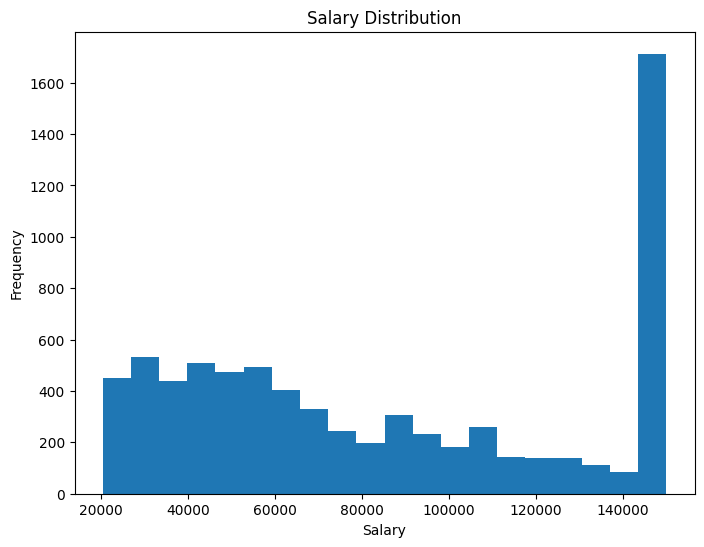

count      7384.000000
mean      85029.394908
std       45178.382538
min       20387.000000
25%       44779.000000
50%       73918.000000
75%      133865.000000
max      150000.000000
Name: Salary, dtype: float64


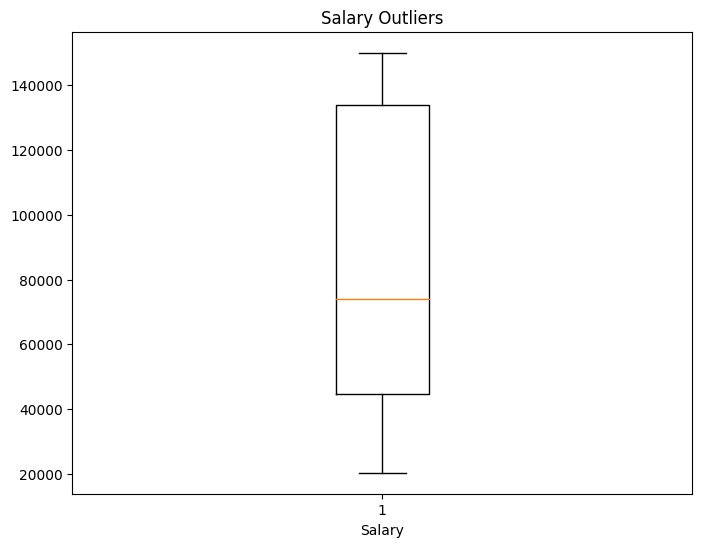

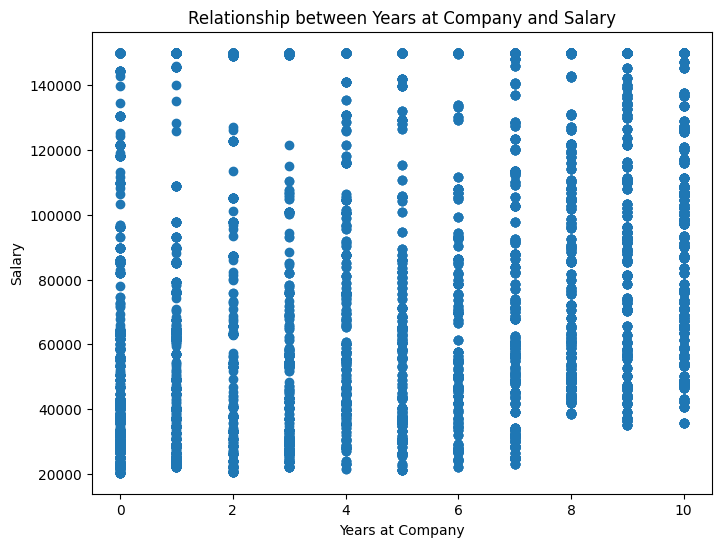

T-statistic (Sales vs. Technology): 14.937980047053891
P-value (Sales vs. Technology): 1.072403702895682e-49
T-statistic (Sales vs. Human Resources): 9.289538194235712
P-value (Sales vs. Human Resources): 3.0690913507489934e-20
T-statistic (Technology vs. Human Resources): 2.6769030999659034
P-value (Technology vs. Human Resources): 0.0074548729994686185


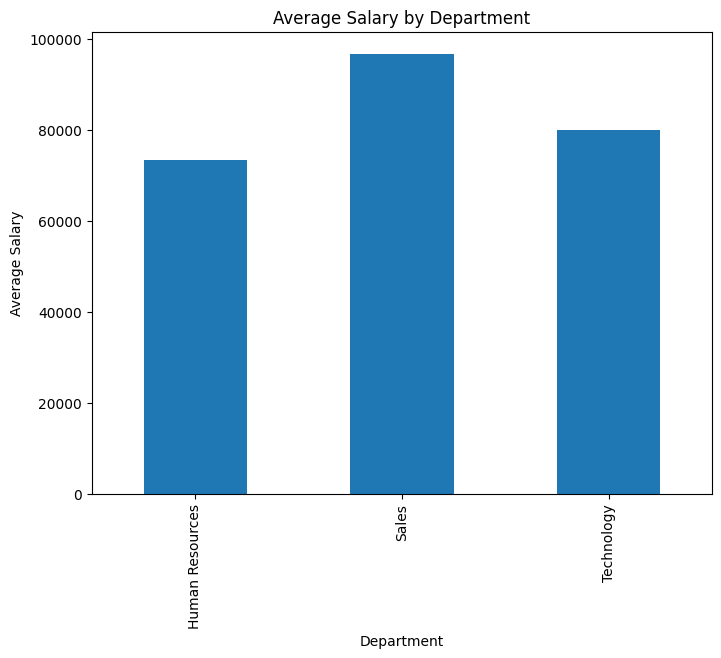

In [50]:
# Visualize Salary Distribution: Histogram
plt.figure(figsize=(8, 6))
plt.hist(employee_data['Salary'], bins=20)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

# Calculate Descriptive Statistics
salary_stats = employee_data['Salary'].describe()
print(salary_stats)

# Identify Outliers: Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(employee_data['Salary'])
plt.xlabel('Salary')
plt.title('Salary Outliers')
plt.show()

# Explore Factors Influencing Salary: Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(employee_data['YearsAtCompany'], employee_data['Salary'])
plt.xlabel('Years at Company')
plt.ylabel('Salary')
plt.title('Relationship between Years at Company and Salary')
plt.show()

# Perform Statistical Tests: T-test

# Assuming you want to compare salary distributions between three groups: Sales, Technology, and Human Resources
group1 = employee_data[employee_data['Department'] == 'Sales']['Salary']
group2 = employee_data[employee_data['Department'] == 'Technology']['Salary']
group3 = employee_data[employee_data['Department'] == 'Human Resources']['Salary']

# Perform t-tests for all pairwise comparisons
t_stat1, p_value1 = ttest_ind(group1, group2)
t_stat2, p_value2 = ttest_ind(group1, group3)
t_stat3, p_value3 = ttest_ind(group2, group3)

print('T-statistic (Sales vs. Technology):', t_stat1)
print('P-value (Sales vs. Technology):', p_value1)
print('T-statistic (Sales vs. Human Resources):', t_stat2)
print('P-value (Sales vs. Human Resources):', p_value2)
print('T-statistic (Technology vs. Human Resources):', t_stat3)
print('P-value (Technology vs. Human Resources):', p_value3)

# Create Visualizations: Bar Chart
avg_salary_by_department = employee_data.groupby('Department')['Salary'].mean()

plt.figure(figsize=(8, 6))
avg_salary_by_department.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.title('Average Salary by Department')
plt.show()


The descriptive statistics for the Salary column in the employee data are as follows:

- Count: 7,384  
- Mean: 85,029.39  
- Standard Deviation: 45,178.38  
- Minimum: 20,387.00  
- 25th Percentile: 44,779.00  
- Median (50th Percentile): 73,918.00  
- 75th Percentile: 133,865.00. 
- Maximum: 150,000.00  

The t-test results for the pairwise comparisons between the Sales, Technology, and Human Resources departments suggest that there are significant variations in salary distributions across the different departments, highlighting potential differences in compensation between the departments. 

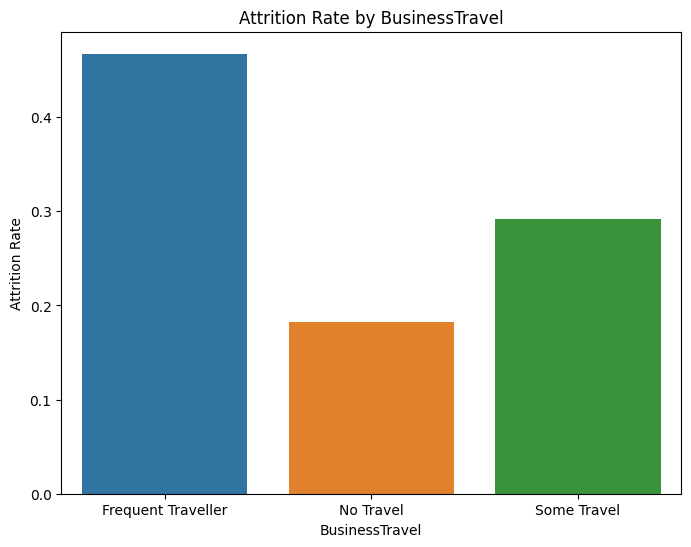

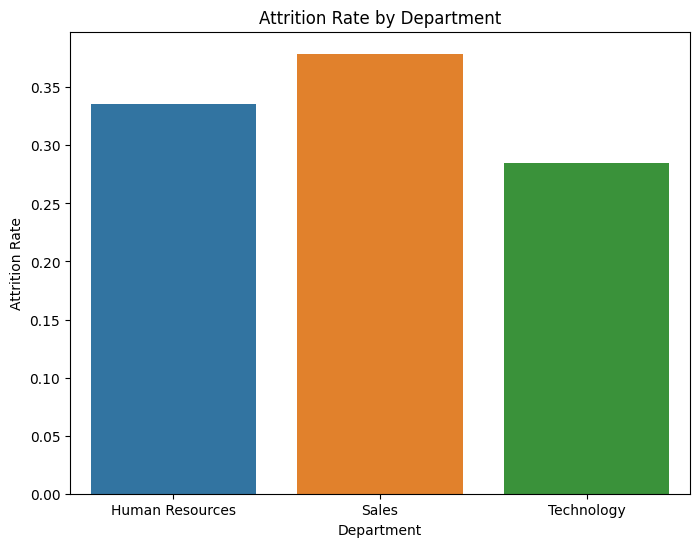

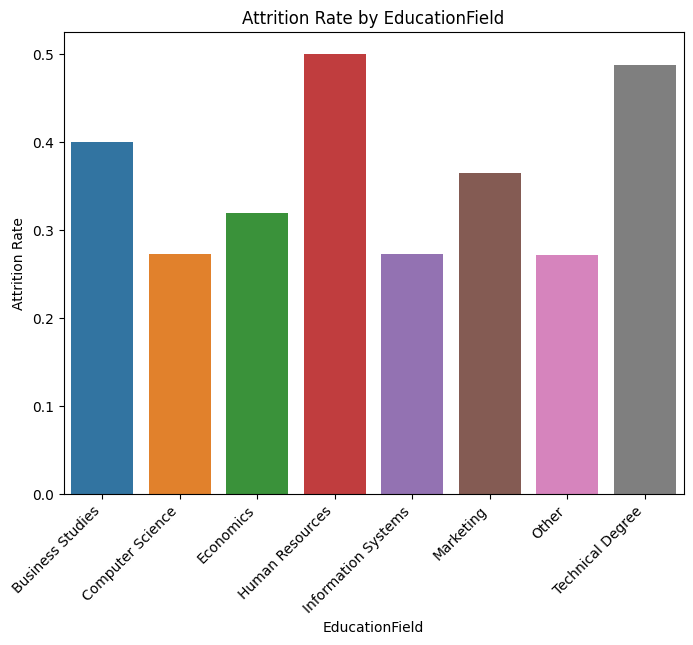

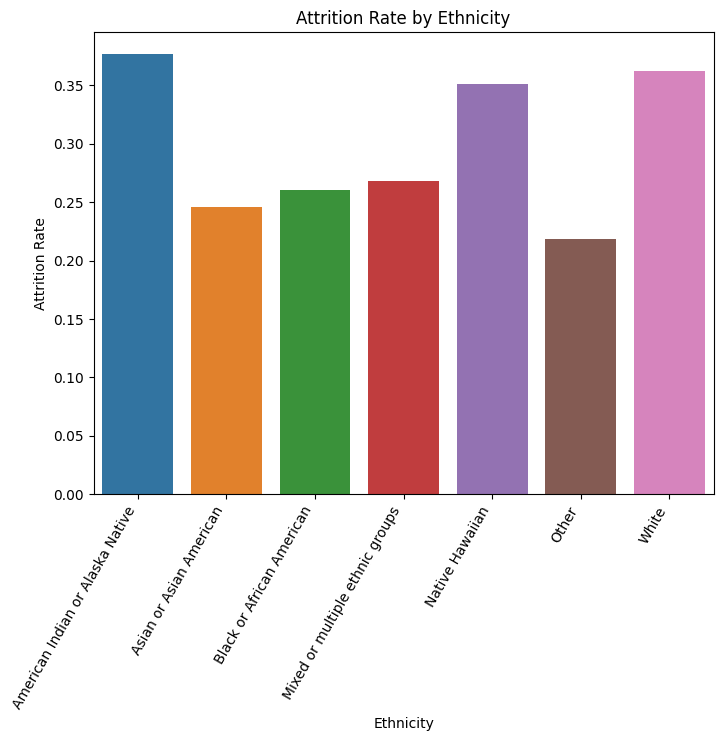

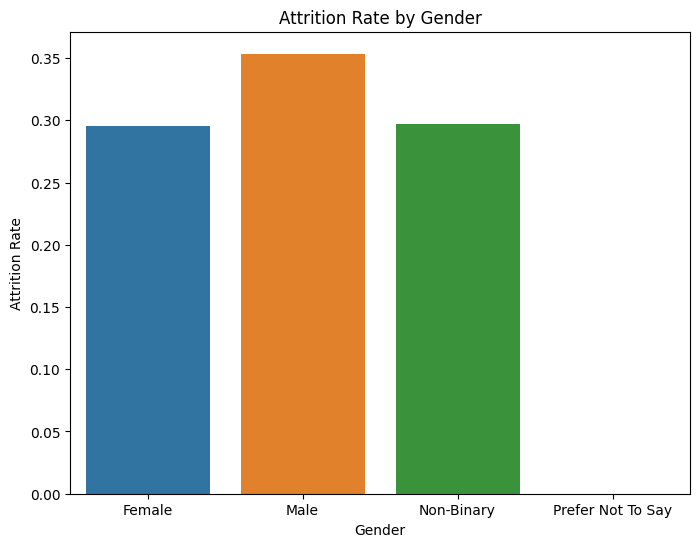

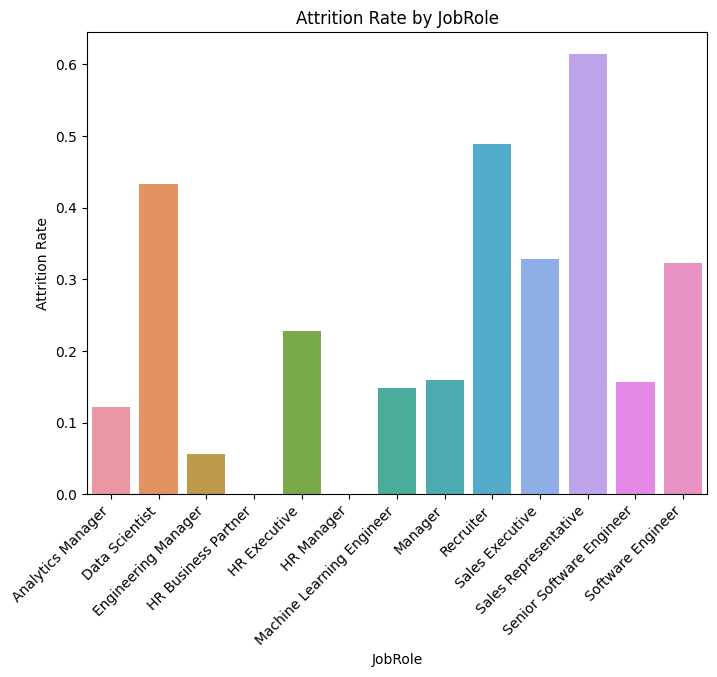

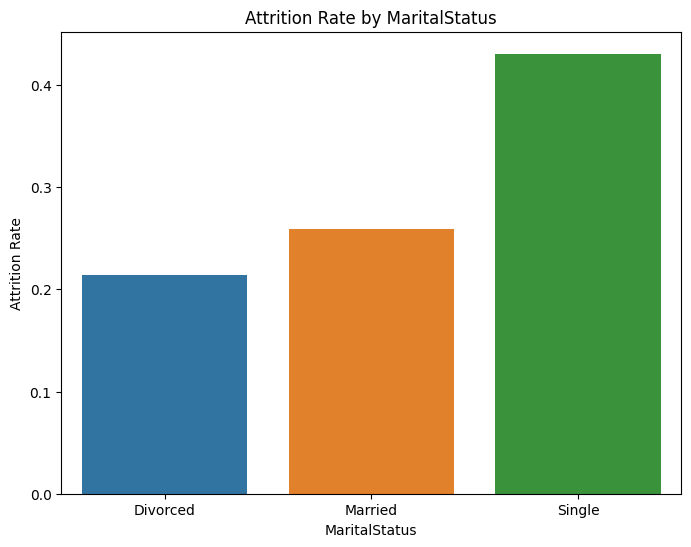

In [51]:
# Attrition factors to consider
attrition_factors = ['BusinessTravel', 'Department', 'EducationField', 'Ethnicity','Gender', 'JobRole', 'MaritalStatus']

# Calculate attrition rates for each factor
attrition_rates = {}
for factor in attrition_factors:
    factor_attrition_rates = employee_data.groupby(factor)['Attrition'].mean()
    attrition_rates[factor] = factor_attrition_rates

# Plot attrition rates for each factor
for factor in attrition_factors:
    plt.figure(figsize=(8, 6))
    if factor in ['EducationField', 'JobRole']:
        sns.barplot(x=attrition_rates[factor].index, y=attrition_rates[factor].values)
        plt.xlabel(factor)
        plt.ylabel('Attrition Rate')
        plt.title('Attrition Rate by {}'.format(factor))
        plt.xticks(rotation=45, ha='right')  # Rotate x-labels by 45 degrees
    elif factor == 'Ethnicity':
        plt.xticks(rotation=60, ha='right')  # Adjust rotation for 'Ethnicity' factor
        sns.barplot(x=attrition_rates[factor].index, y=attrition_rates[factor].values)
        plt.xlabel(factor)
        plt.ylabel('Attrition Rate')
        plt.title('Attrition Rate by {}'.format(factor))
    else:
        sns.barplot(x=attrition_rates[factor].index, y=attrition_rates[factor].values)
        plt.xlabel(factor)
        plt.ylabel('Attrition Rate')
        plt.title('Attrition Rate by {}'.format(factor))
    plt.show()



In [52]:
attrition_counts = employee_data['Attrition'].value_counts()
print(attrition_counts)



False    5038
True     2346
Name: Attrition, dtype: int64


In [53]:
# Perform statistical tests (e.g., t-tests or chi-square tests) to determine the significance of these relationships

# Categorical variables: Chi-square test
categorical_variables = ['Department', 'Gender', 'Education', 'Ethnicity']

for variable in categorical_variables:
    contingency_table = pd.crosstab(employee_data['Attrition'], employee_data[variable])

    # Chi-square test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test results for {variable}:")
    print(f"Chi-square statistic: {chi2_stat}")
    print(f"P-value: {p_value}")
    print('\n')

# Continuous variables: t-test and ANOVA
continuous_variables = ['Age', 'YearsAtCompany']

for variable in continuous_variables:
    attrition_yes = employee_data[employee_data['Attrition']][variable]
    attrition_no = employee_data[~employee_data['Attrition']][variable]

    # T-test
    t_stat, p_value_ttest = stats.ttest_ind(attrition_yes, attrition_no, nan_policy='omit')
    print(f"T-test results for {variable}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value_ttest}")

    # ANOVA test
    f_stat, p_value_anova = stats.f_oneway(attrition_yes, attrition_no)
    print(f"ANOVA test results for {variable}:")
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_value_anova}")
    print('\n')

Chi-square test results for Department:
Chi-square statistic: 64.6085956375531
P-value: 9.34160964385031e-15


Chi-square test results for Gender:
Chi-square statistic: 69.61985730699976
P-value: 5.148202474235097e-15


Chi-square test results for Education:
Chi-square statistic: 38.281550677241356
P-value: 9.802640511469673e-08


Chi-square test results for Ethnicity:
Chi-square statistic: 92.05700247119265
P-value: 1.1323078124223156e-17


T-test results for Age:
T-statistic: -29.214359038843952
P-value: 1.2089561716420158e-177
ANOVA test results for Age:
F-statistic: 853.4787740504826
P-value: 1.2089561716455424e-177


T-test results for YearsAtCompany:
T-statistic: -64.99669615455633
P-value: 0.0
ANOVA test results for YearsAtCompany:
F-statistic: 4224.570511007719
P-value: 0.0




**For the categorical variables:**
It appears there is a statistically significant association between the variables that were tested (Department, Gender, Education, and Ethnicity) and the observed frequencies. 

In all four tests, the p-values are extremely small (close to zero), indicating strong evidence to reject the null hypothesis of independence. Therefore, we can conclude that there is a significant association between the variables being tested (Department, Gender, Education, and Ethnicity) and the observed frequencies. 

In [54]:
ethnicity_values = employee_data['Ethnicity'].unique()
print(ethnicity_values)


['White' 'Asian or Asian American' 'Mixed or multiple ethnic groups'
 'Black or African American' 'Native Hawaiian' 'Other'
 'American Indian or Alaska Native']


In [55]:
# Further analysis and segmentation based on relevant variables such as department, gender, or ethnicity

# Segment the data based on department
department_groups = employee_data.groupby('Department')

# Segment the data based on Ethnicity
ethnicity_groups = employee_data.groupby('Ethnicity')

# Specify the number of bins you want
num_bins = 5

# Analyze attrition within each department
for department, data in department_groups:
    attrition_count = data['Attrition'].value_counts()
    print(f"Department: {department}")
    print(attrition_count)
    print()

# Segment the data based on age
age_bins = pd.qcut(employee_data['Age'], q=num_bins, labels=False)
age_labels = ['18-29', '30-39', '40-49', '50-59', '60 and above']  # Adjusted labels
age_groups = pd.cut(employee_data['Age'], bins=num_bins, labels=age_labels)

# Analyze attrition within each age group
age_attrition_count = employee_data.groupby(age_groups)['Attrition'].value_counts()
print("Attrition by Age Group:")
print(age_attrition_count)
print()

# Analyze attrition by Ethnicity
ethnicity_attrition_count = employee_data['Ethnicity'].value_counts()
print("Attrition by Ethnicity:")
print(ethnicity_attrition_count)
print()

# Segment the data based on years at the company
years_bins = pd.qcut(employee_data['YearsAtCompany'], q=num_bins, labels=False)
years_labels = ['0-4', '5-9', '10-14', '15-19', '20-29']
years_groups = pd.cut(employee_data['YearsAtCompany'], bins=num_bins, labels=years_labels)

# Analyze attrition within each years group
years_attrition_count = employee_data.groupby(years_groups)['Attrition'].value_counts()
print("Attrition by Years at Company Group:")
print(years_attrition_count)


Department: Human Resources
False    232
True     117
Name: Attrition, dtype: int64

Department: Sales
False    1480
True      903
Name: Attrition, dtype: int64

Department: Technology
False    3326
True     1326
Name: Attrition, dtype: int64

Attrition by Age Group:
Age           Attrition
18-29         False         954
              True          919
30-39         False        1717
              True         1145
40-49         False         893
              True           74
50-59         False         987
              True          160
60 and above  False         487
              True           48
Name: Attrition, dtype: int64

Attrition by Ethnicity:
White                               3723
Mixed or multiple ethnic groups     1198
Black or African American           1197
Asian or Asian American              716
American Indian or Alaska Native     292
Native Hawaiian                      171
Other                                 87
Name: Ethnicity, dtype: int64

Attrition by Ye

Here are the attrition counts for each department:

- **Human Resources:** No=51, Yes=12
- **Sales:** No=354, Yes=92
- **Technology:** No=828, Yes=133

Here are the attrition counts for each age group:

- **Age 18-29:** No=425, Yes=96
- **Age 30-39:** No=397, Yes=113
- **Age 40-49:** No=160, Yes=7
- **Age 50-59:** No=166, Yes=16
- **Age 60 and above:** No=85, Yes=5

Here are the attrition counts for each Ethnicity:
- **White:** 3723 employees
- **Mixed or multiple ethnic groups:** 1198 employees
- **Black or African American:** 1197 employees
- **Asian or Asian American:** 716 employees
- **American Indian or Alaska Native:** 292 employees
- **Native Hawaiian:** 171 employees
- **Other:** 87 employees

Finally, here are the attrition counts for each years at the company group:

- **Years 0-4:** No=345, Yes=146
- **Years 5-9:** No=238, Yes=39
- **Years 10-14:** No=185, Yes=31
- **Years 15-19:** No=225, Yes=15
- **Years 20-29:** No=240, Yes=6

These results provide insights into attrition patterns within different departments, age groups, and years at the company. 

In [56]:
# Select relevant features and target variable
features = ['Age', 'Department', 'Education', 'Gender', 'YearsAtCompany']
target = 'Attrition'
data = employee_data[features + [target]]

# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Split the data into training and testing sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the attrition for the test set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Get the coefficients (importance) of each feature
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('Coefficient', ascending=False)
print("Feature Importance:")
print(coefficients)

Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.86      0.86      1015
        True       0.70      0.69      0.69       462

    accuracy                           0.81      1477
   macro avg       0.78      0.78      0.78      1477
weighted avg       0.81      0.81      0.81      1477

Feature Importance:
                    Feature  Coefficient
6         Gender_Non-Binary     0.150099
5               Gender_Male     0.133295
3          Department_Sales     0.020827
0                       Age     0.020589
1                 Education    -0.190019
4     Department_Technology    -0.427286
2            YearsAtCompany    -0.538628
7  Gender_Prefer Not To Say    -2.447551


### Classification Report:

- **Precision:** The precision for the "False" class (no attrition) is 0.86, indicating that 86% of the instances predicted as "False" were actually "False". The precision for the "True" class (attrition) is 0.70, meaning that 70% of the instances predicted as "True" were actually "True".

- **Recall:** The recall for the "False" class is 0.86, indicating that 86% of the actual "False" instances were correctly identified. The recall for the "True" class is 0.69, meaning that 69% of the actual "True" instances were correctly identified.

- **F1-score:** The F1-score for the "False" class is 0.86, and for the "True" class, it is 0.69.

- **Support:** In this case, there are 1015 instances of the "False" class and 462 instances of the "True" class.

- **Accuracy:** The accuracy of the model on the test set is 0.81, meaning that 81% of the instances were correctly classified.

### Feature Importance:

These coefficients indicate the strength and direction of the relationship between each feature and the likelihood of attrition.

**Gender_Non-Binary:** This feature has a positive coefficient of 0.150099, indicating that employees who identify as non-binary have a higher likelihood of attrition.

**Gender_Male:** This feature also has a positive coefficient of 0.133295, indicating that male employees have a slightly higher likelihood of attrition.

**Department_Sales:** This feature has a positive coefficient of 0.020827, suggesting that being in the sales department is associated with a slightly higher likelihood of attrition.

**Age:** The age feature has a positive coefficient of 0.020589, suggesting that younger employees may have a slightly higher likelihood of attrition.

**Education:** This feature has a negative coefficient of -0.190019, indicating that higher levels of education are associated with a lower likelihood of attrition.

**Department_Technology:** This feature has a negative coefficient of -0.427286, suggesting that being in the technology department is associated with a lower likelihood of attrition.

**YearsAtCompany:** This feature has a negative coefficient of -0.538628, indicating that employees with more years at the company have a lower likelihood of attrition.

**Gender_Prefer Not To Say:** This feature has the most negative coefficient of -2.447551, indicating that employees who prefer not to disclose their gender have a significantly lower likelihood of attrition.Please note this group had 89 total employees who elected this option. 

It appears that gender (non-binary and male), education level, department (sales and technology), years at the company, and age all have some influence on attrition. Employees who prefer not to disclose their gender seem to have the lowest likelihood of attrition.

In [57]:
print(data.head())

   Age  Education  ...  Gender_Non-Binary  Gender_Prefer Not To Say
0   30          5  ...                  0                         0
1   30          5  ...                  0                         0
2   30          5  ...                  0                         0
3   30          5  ...                  0                         0
4   30          5  ...                  0                         0

[5 rows x 9 columns]


In [58]:
employee_data['JobSatisfaction'].unique()

array(['Neutral', 'Satisfied', 'Very Satisfied', 'Dissatisfied',
       'Very Dissatisfied', nan], dtype=object)

Overall Job Satisfaction:
4.0    0.252985
2.0    0.248264
3.0    0.245487
5.0    0.234240
1.0    0.019022
Name: JobSatisfaction, dtype: float64

Correlation with Job Satisfaction:
JobSatisfaction            1.000000
OverTime                   0.019651
Attrition                  0.012901
Salary                     0.003816
Age                        0.002172
EducationLevelID           0.002004
Education                  0.002004
YearsAtCompany             0.001003
YearsSinceLastPromotion   -0.000380
YearsInMostRecentRole     -0.000518
YearsWithCurrManager      -0.000585
DistanceFromHome (KM)     -0.005897
EmployeeID                -0.006550
StockOptionLevel          -0.006611
Name: JobSatisfaction, dtype: float64

Department: Human Resources
Job Satisfaction Distribution:
4.0    0.265487
3.0    0.244838
2.0    0.241888
5.0    0.233038
1.0    0.014749
Name: JobSatisfaction, dtype: float64

Department: Sales
Job Satisfaction Distribution:
2.0    0.262909
4.0    0.242685
3.0    0.238382
5.

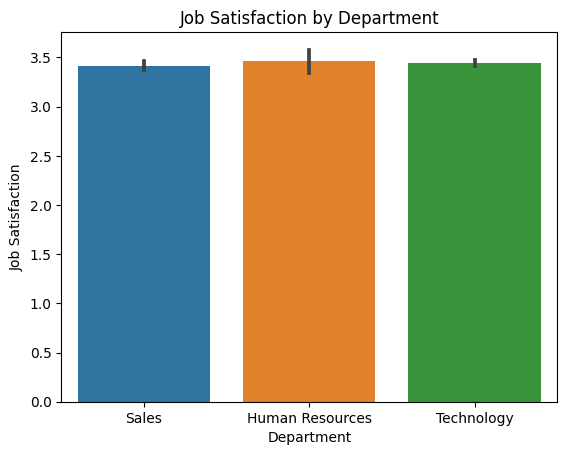

In [59]:
# Map the categories to numerical values
satisfaction_mapping = {
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very Satisfied': 5
}

employee_data['JobSatisfaction'] = employee_data['JobSatisfaction'].map(satisfaction_mapping)

# Calculate the overall level of job satisfaction
overall_satisfaction = employee_data['JobSatisfaction'].value_counts(normalize=True)
print("Overall Job Satisfaction:")
print(overall_satisfaction)
print()

# Identify key drivers of job satisfaction
correlation_matrix = employee_data.corr()
print("Correlation with Job Satisfaction:")
print(correlation_matrix['JobSatisfaction'].sort_values(ascending=False))
print()

# Determine variations in job satisfaction across different groups
department_groups = employee_data.groupby('Department')
for department, group in department_groups:
    satisfaction_counts = group['JobSatisfaction'].value_counts(normalize=True)
    print("Department:", department)
    print("Job Satisfaction Distribution:")
    print(satisfaction_counts)
    print()

# Perform t-test between two departments
department_a = employee_data[employee_data['Department'] == 'A']['JobSatisfaction']
department_b = employee_data[employee_data['Department'] == 'B']['JobSatisfaction']
t_statistic, p_value = ttest_ind(department_a, department_b)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print()

# Visualize results
# Bar plot of job satisfaction by department
sns.barplot(x='Department', y='JobSatisfaction', data=employee_data)
plt.title('Job Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Job Satisfaction')
plt.show()


**Overall Job Satisfaction Distribution:**

- 1.0 (Very Dissatisfied): 1.9%
- 2.0 (Dissatisfied): 24.8%
- 3.0 (Neutral): 24.5%
- 4.0 (Satisfied): 25.3%
- 5.0 (Very Satisfied): 23.4%

**Correlation with Job Satisfaction:**

- The Job Satisfaction variable has a positive correlation with _OverTime_ and _Attrition_, although the correlations are relatively weak.
- The other variables, including _Salary_, _Age_, _EducationLevelID_, _Education_, _YearsAtCompany_, _YearsSinceLastPromotion_, _YearsInMostRecentRole_, _YearsWithCurrManager_, _DistanceFromHome (KM)_, _EmployeeID_, and _StockOptionLevel_, have very weak correlations with Job Satisfaction.

**Job Satisfaction Distribution by Department:**

**Human Resources:**
- 1.0 (Very Dissatisfied): 1.5%
- 2.0 (Dissatisfied): 24.2%
- 3.0 (Neutral): 24.5%
- 4.0 (Satisfied): 26.5%
- 5.0 (Very Satisfied): 23.3%
**Sales:**
- 1.0 (Very Dissatisfied): 1.9%
- 2.0 (Dissatisfied): 26.3%
- 3.0 (Neutral): 23.8%
- 4.0 (Satisfied): 24.3%
- 5.0 (Very Satisfied): 23.7%
**Technology:**
- 1.0 (Very Dissatisfied): 1.9%
- 2.0 (Dissatisfied): 24.1%
- 3.0 (Neutral): 24.9%
- 4.0 (Satisfied): 25.7%
- 5.0 (Very Satisfied): 23.3%

In [60]:
employee_data['WorkLifeBalance'].unique()

array(['Satisfied', 'Dissatisfied', 'Neutral', 'Very Satisfied',
       'Very Dissatisfied', nan], dtype=object)

In [61]:
# Calculate Work-Life Balance Score

# Map the string values in 'WorkLifeBalance' column to numerical scores
work_life_balance_mapping = {
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very Satisfied': 5
}
employee_data['WorkLifeBalanceScore'] = employee_data['WorkLifeBalance'].map(work_life_balance_mapping)

# Define weights for each factor (adjust the weights as per your preference)
weight_work_life_balance = 0.4
weight_years_at_company = 0.3
weight_years_in_most_recent_role = 0.3

# Calculate the work-life balance score as a weighted sum of factors
work_life_balance_score = (
    weight_work_life_balance * employee_data['WorkLifeBalanceScore'] +
    weight_years_at_company * (1 - (employee_data['YearsAtCompany'] / employee_data['YearsAtCompany'].max())) +
    weight_years_in_most_recent_role * (1 - (employee_data['YearsInMostRecentRole'] / employee_data['YearsInMostRecentRole'].max()))
)

# Add the calculated work-life balance score to the DataFrame
employee_data['WorkLifeBalanceScore'] = work_life_balance_score

# Display the results
print(employee_data[['WorkLifeBalance', 'YearsAtCompany', 'YearsInMostRecentRole', 'WorkLifeBalanceScore']].head())

  WorkLifeBalance  YearsAtCompany  YearsInMostRecentRole  WorkLifeBalanceScore
0       Satisfied              10                      4                  1.78
1    Dissatisfied              10                      4                  0.98
2       Satisfied              10                      4                  1.78
3         Neutral              10                      4                  1.38
4         Neutral              10                      4                  1.38


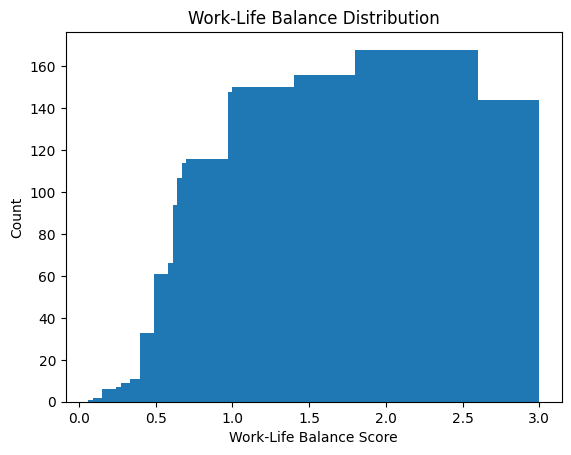

Employees with Work-Life Balance Issues:
      EmployeeID  WorkLifeBalanceScore
1        3012141                  0.98
3        3012141                  1.38
4        3012141                  1.38
5        3012141                  1.38
7        3012141                  0.98
...          ...                   ...
7367          62                  1.40
7369          62                  1.40
7370          62                  1.40
7371          62                  1.40
7374          62                  1.40

[3548 rows x 2 columns]
WorkLifeBalanceScore
2.20    168
1.80    156
1.40    150
1.37    148
2.60    144
       ... 
0.46      1
0.67      1
0.49      1
0.82      1
0.46      1
Length: 147, dtype: int64


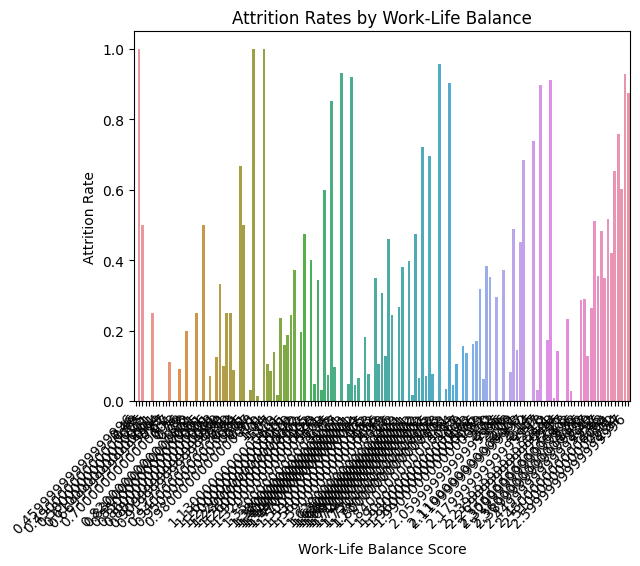

In [71]:
# Group the data by work-life balance score and calculate the count in each category
work_life_balance_distribution = employee_data.groupby('WorkLifeBalanceScore').size()

# Plot the work-life balance distribution
plt.bar(work_life_balance_distribution.index, work_life_balance_distribution.values)
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Count')
plt.title('Work-Life Balance Distribution')
plt.show()

# Identify employees with work-life balance scores below the mean
mean_work_life_balance_score = employee_data['WorkLifeBalanceScore'].mean()
work_life_balance_issues = employee_data[employee_data['WorkLifeBalanceScore'] < mean_work_life_balance_score]

# Display the employees with work-life balance issues
print("Employees with Work-Life Balance Issues:")
print(work_life_balance_issues[['EmployeeID', 'WorkLifeBalanceScore']])

# Group the data by work-life balance score and count the occurrences
work_life_balance_counts = employee_data.groupby('WorkLifeBalanceScore').size()

# Sort the counts in descending order to identify the most common
common_challenges = work_life_balance_counts.sort_values(ascending=False)

# Print the common challenges/issues
print(common_challenges)

# Calculate the retention rates for different work-life balance groups
attrition_rates = employee_data.groupby('WorkLifeBalanceScore')['Attrition'].mean()

# Visualize the retention rates
ax = sns.barplot(x=attrition_rates.index, y=attrition_rates.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Attrition Rates by Work-Life Balance')
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Attrition Rate')
plt.show()

Prevalence of Overtime Work:
True    100.0
Name: OverTime, dtype: float64
Job Satisfaction Distribution - Overtime Employees:
4.0    591
5.0    581
2.0    570
3.0    566
1.0     42
Name: JobSatisfaction, dtype: int64
Job Satisfaction Distribution - Non-Overtime Employees:
4.0    1231
2.0    1218
3.0    1202
5.0    1106
1.0      95
Name: JobSatisfaction, dtype: int64
Retention Rate - Overtime Employees:
52.257525083612045
Retention Rate - Non-Overtime Employees:
21.955128205128204


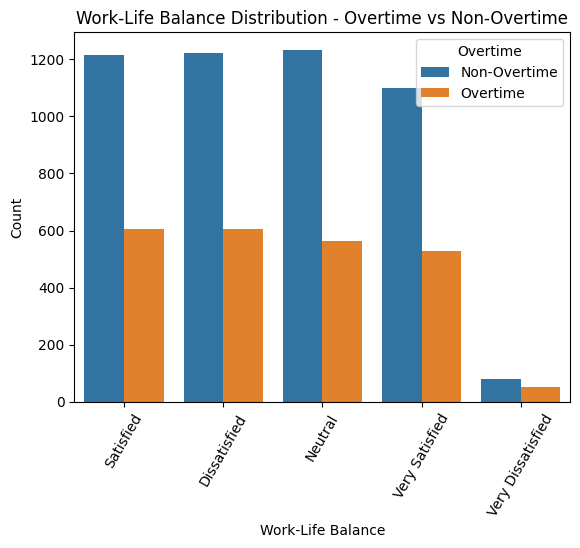

In [63]:
# Filter overtime and non-overtime employees
overtime_employees = employee_data[employee_data['OverTime'] == True]
non_overtime_employees = employee_data[employee_data['OverTime'] == False]

# Prevalence of Overtime Work
overtime_prevalence = overtime_employees['OverTime'].value_counts(normalize=True) * 100
print("Prevalence of Overtime Work:")
print(overtime_prevalence)

# Job Satisfaction Distribution - Overtime Employees
print("Job Satisfaction Distribution - Overtime Employees:")
print(overtime_employees['JobSatisfaction'].value_counts())

# Job Satisfaction Distribution - Non-Overtime Employees
print("Job Satisfaction Distribution - Non-Overtime Employees:")
print(non_overtime_employees['JobSatisfaction'].value_counts())

# Retention Rate - Overtime Employees
overtime_retention_rate = overtime_employees['Attrition'].mean() * 100
print("Retention Rate - Overtime Employees:")
print(overtime_retention_rate)

# Retention Rate - Non-Overtime Employees
non_overtime_retention_rate = non_overtime_employees['Attrition'].mean() * 100
print("Retention Rate - Non-Overtime Employees:")
print(non_overtime_retention_rate)

# Analyze the relationship between work-life balance and overtime work
sns.countplot(x='WorkLifeBalance', hue='OverTime', data=employee_data)
plt.title('Work-Life Balance Distribution - Overtime vs Non-Overtime')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.legend(title='Overtime', labels=['Non-Overtime', 'Overtime'])
plt.xticks(rotation=60)
plt.show()

The retention rate for overtime employees is 52.26%, while for non-overtime employees is 21.96%.

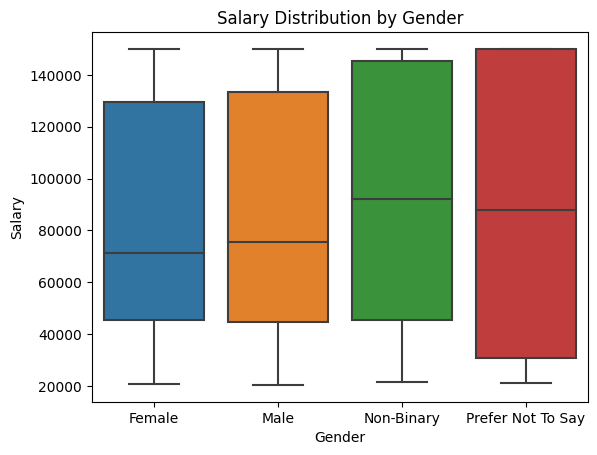

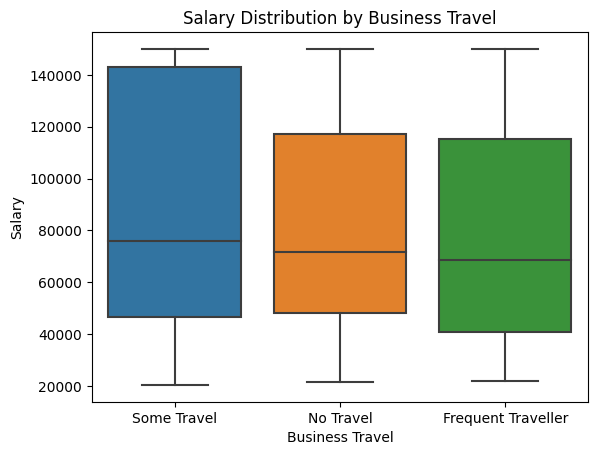

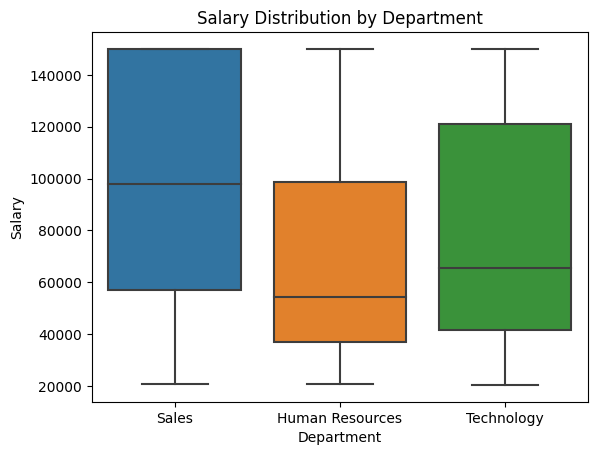

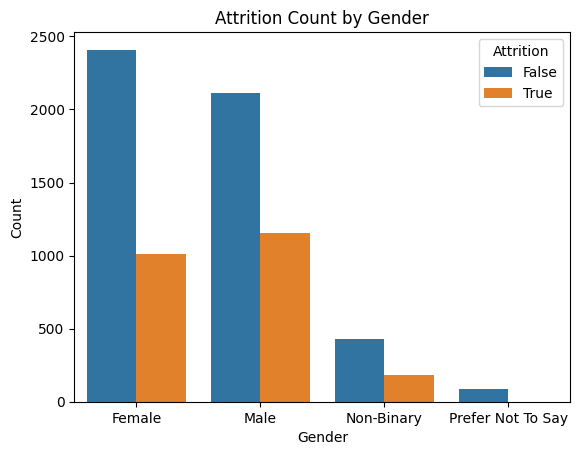

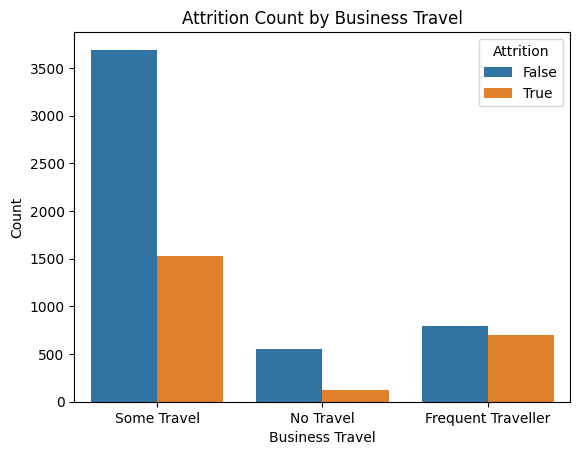

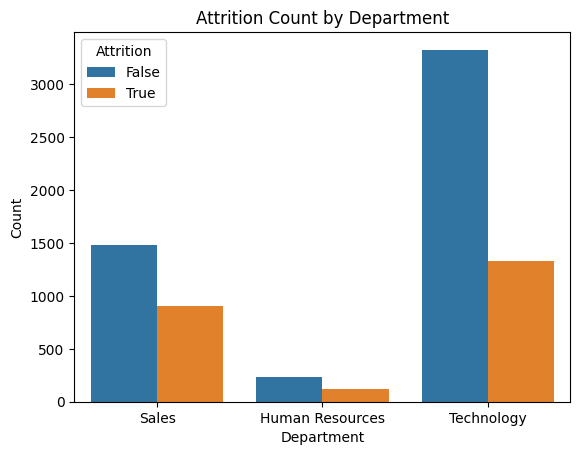

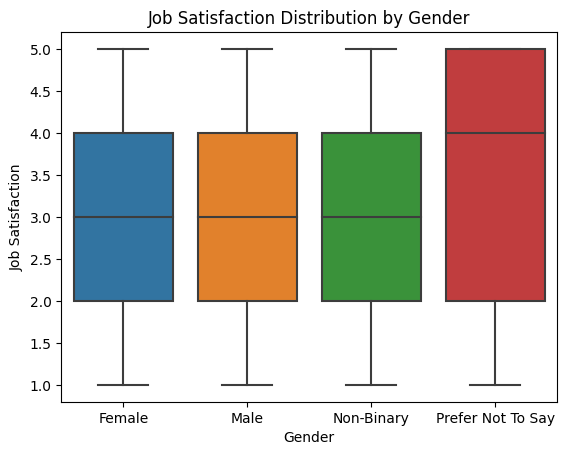

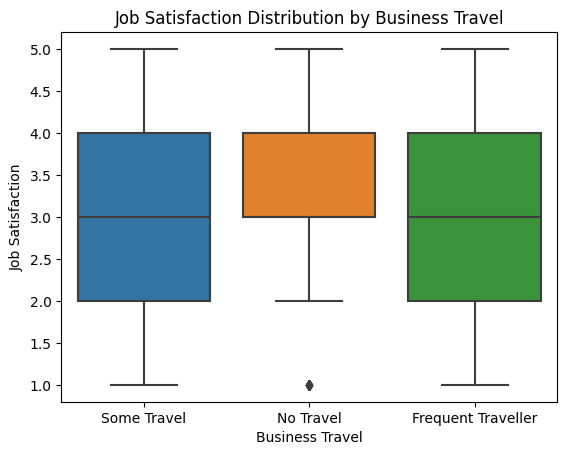

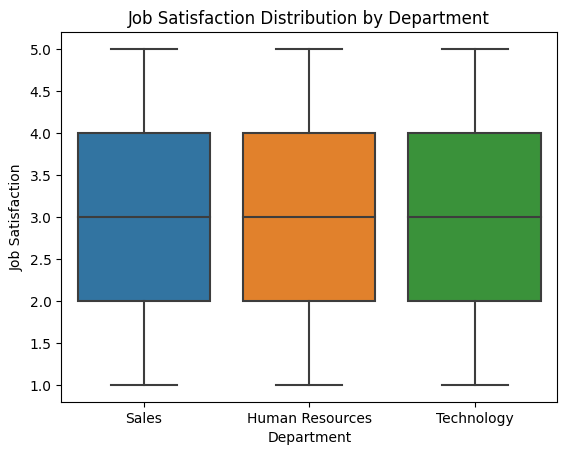

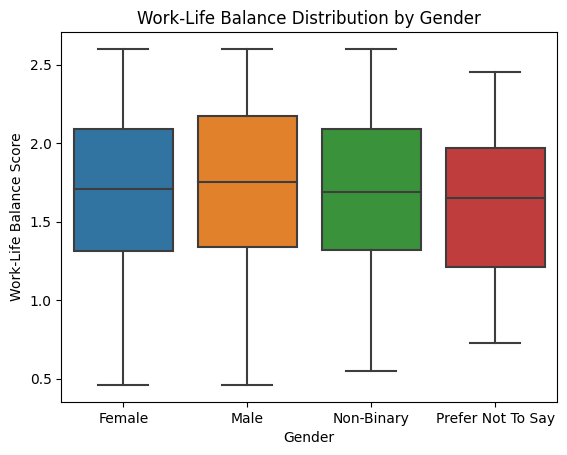

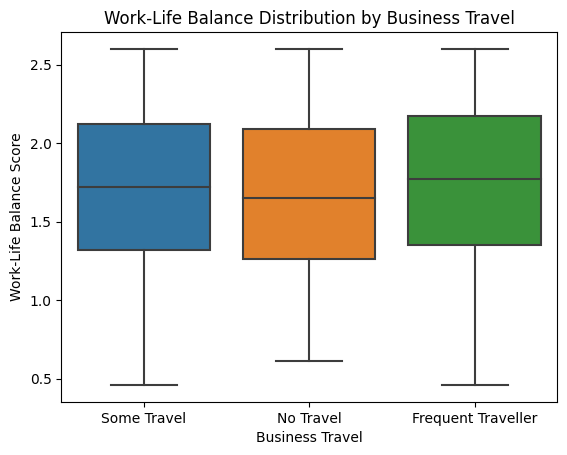

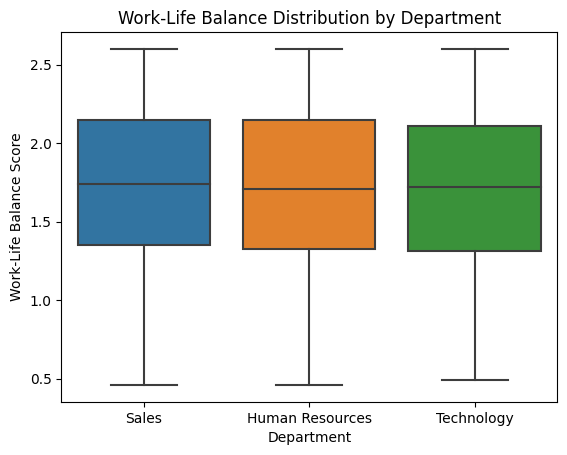

In [64]:
# Analyze salary across different groups
sns.boxplot(x='Gender', y='Salary', data=employee_data)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

sns.boxplot(x='BusinessTravel', y='Salary', data=employee_data)
plt.title('Salary Distribution by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Salary')
plt.show()

sns.boxplot(x='Department', y='Salary', data=employee_data)
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.show()

# Analyze attrition across different groups
sns.countplot(x='Gender', hue='Attrition', data=employee_data)
plt.title('Attrition Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

sns.countplot(x='BusinessTravel', hue='Attrition', data=employee_data)
plt.title('Attrition Count by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()

sns.countplot(x='Department', hue='Attrition', data=employee_data)
plt.title('Attrition Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

# Analyze job satisfaction across different groups
sns.boxplot(x='Gender', y='JobSatisfaction', data=employee_data)
plt.title('Job Satisfaction Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Job Satisfaction')
plt.show()

sns.boxplot(x='BusinessTravel', y='JobSatisfaction', data=employee_data)
plt.title('Job Satisfaction Distribution by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Job Satisfaction')
plt.show()

sns.boxplot(x='Department', y='JobSatisfaction', data=employee_data)
plt.title('Job Satisfaction Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Job Satisfaction')
plt.show()

# Analyze work-life balance across different groups
sns.boxplot(x='Gender', y='WorkLifeBalanceScore', data=employee_data)
plt.title('Work-Life Balance Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Work-Life Balance Score')
plt.show()

sns.boxplot(x='BusinessTravel', y='WorkLifeBalanceScore', data=employee_data)
plt.title('Work-Life Balance Distribution by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Work-Life Balance Score')
plt.show()

sns.boxplot(x='Department', y='WorkLifeBalanceScore', data=employee_data)
plt.title('Work-Life Balance Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Work-Life Balance Score')
plt.show()

In [65]:
# Specify the path and filename for the exported data
export_path = 'data/employee_cleaned.csv'

# Save the cleaned and transformed data to a CSV file
employee_data.to_csv(export_path, index=False)

# Print a success message
print("Data exported to Tableau successfully!")

Data exported to Tableau successfully!
